<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 2: Machine Learning for Malware Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 35 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been given a large sample of derived malware features that describe 14 different malware variants (2000 samples of each). The purpose of this task is to understand the underlying concepts of classification, and **your task will be to develop two classifiers that can classify malware varients**. The first part will focus on a small hand-made classifier using only 3 malware classes, to understand the principles of search space and minimisation of a function. The second part will focus on using off-the-shelf libraries to scale up the classification to all 14 classes of malware present in the dataset.

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

**Part 1: Developing a Classifier "by hand" - (Total Marks: 20)**

* **Task 1:** Find the Centroid point of each of the three groups (3)
* **Task 2:** Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)
* **Task 3:** For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)
* **Task 4:** Provide a final accuracy score for the performance of your "by hand" classifier (2)

**Part 2: Developing a large-scale ML classifier - (Total Marks: 15)**

* **Task 5:** Scale the Input Features for further processing using the StandardScaler function (1)
* **Task 6:** Obtain numerical labels for each class using the LabelEncoder function (1)
* **(Advanced) Task 7:** Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)
* **(Advanced) Task 8:** Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 9:** Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 10:** Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('DATA/T2_data/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [3]:
labels = pd.read_csv('DATA/T2_data/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels

,label
0,high
1,high
2,high
3,high
4,high
...,...
27995,zbot
27996,zbot
27997,zbot
27998,zbot


In the cells above, we have created two DataFrames: ***features*** and ***labels***.

***Features***: This table contains 28000 instances of malware, where each instance of malware is characterised by 256 distinct features relating to how it performs and its impact on the associated systems.

***Labels***: This table contains 28000 rows, where each row is the label of the malware class, related to the features table. There are 2000 samples of each malware varient, and 14 varients in total.

## Part 1: Developing a Classifier "by hand"

In [4]:

# DO NOT MODIFY THIS CELL - this cell is splitting the data to provide a suitable subset of data to work with for this task.
# If you change this cell your output will differ from that expected and could impact your mark.


mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


Text(0, 0.5, 'Feature Y')

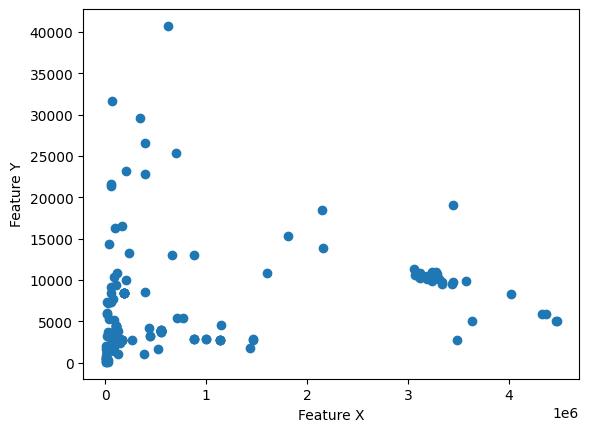

In [5]:
plt.scatter(train_data['x'], train_data['y'])
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

### Task 1: Find the Centroid point of each of the three groups (3)

In [6]:
import pandas as pd
df = train_data.copy() 
unique_labels=df.labels.unique()
unique_labels

array(['wannacry', 'startsurf', 'razy'], dtype=object)

In [7]:
wannacry_values = df[df['labels']=='wannacry']
wannacry_mean_x = wannacry_values['x'].mean()
wannacry_mean_y = wannacry_values['y'].mean()

startsurf_values = df[df['labels'] == 'startsurf']
startsurf_mean_x = startsurf_values['x'].mean()
startsurf_mean_y = startsurf_values['y'].mean()

razy_values = df[df['labels'] == 'razy']
razy_mean_x = razy_values['x'].mean()
razy_mean_y = razy_values['y'].mean()

In [8]:
print(f'wannacry values: {wannacry_mean_x}, {wannacry_mean_y},startsurf values: {startsurf_mean_x}, {startsurf_mean_y}, razy values: {razy_mean_x},{razy_mean_y}')

wannacry values: 2181660.66, 11087.1,startsurf values: 478778.12, 3754.04, razy values: 100505.22,6158.28


### Task 2: Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)

In [9]:
from matplotlib import pyplot as plt
import numpy as np

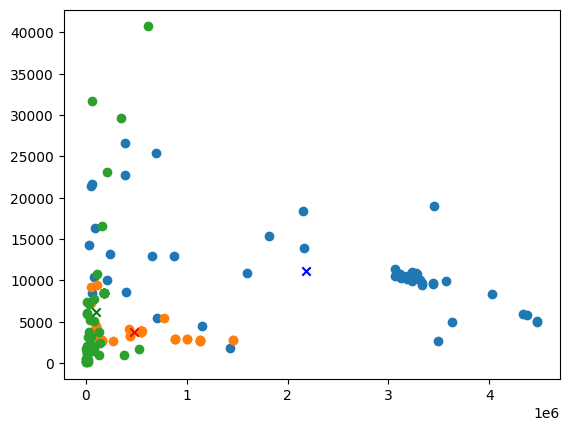

In [10]:
plt.scatter(wannacry_values['x'],wannacry_values['y'])#blue
plt.scatter(startsurf_values['x'],startsurf_values['y'])#orange
plt.scatter(razy_values['x'],razy_values['y'])#green

plt.scatter(wannacry_mean_x, wannacry_mean_y,marker='x',color= 'blue')
plt.scatter(startsurf_mean_x,startsurf_mean_y,marker='x', color = 'red')
plt.scatter(razy_mean_x,razy_mean_y,marker='x', color = 'green')

plt.show()

### Task 3: For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task*

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

group 1: [[1.478119e+06 1.057500e+04]
 [4.085568e+06 6.635000e+03]
 [2.647584e+06 1.956600e+04]
 [4.470838e+06 5.131000e+03]
 [3.080470e+06 1.198200e+04]
 [2.557845e+06 1.261400e+04]
 [2.408836e+06 1.768000e+04]
 [1.629088e+06 1.608800e+04]
 [2.029047e+06 1.453500e+04]
 [3.200482e+06 1.294100e+04]
 [2.793317e+06 4.455000e+03]
 [4.168106e+06 6.402000e+03]
 [3.365656e+06 9.376000e+03]
 [2.706358e+06 4.265400e+04]
 [3.226525e+06 1.128700e+04]
 [2.034733e+06 2.223300e+04]
 [4.454087e+06 5.911000e+03]
 [3.325408e+06 9.758000e+03]
 [1.462916e+06 2.814000e+03]
 [1.462796e+06 2.816000e+03]
 [1.462793e+06 2.799000e+03]]
group 2: [[3.338140e+05 2.077300e+04]
 [4.372640e+05 2.106000e+04]
 [6.680820e+05 1.065500e+04]
 [3.680960e+05 7.205000e+03]
 [8.800480e+05 2.788000e+03]
 [1.000928e+06 2.835000e+03]
 [5.509660e+05 3.874000e+03]
 [7.801000e+05 7.460000e+02]
 [5.509890e+05 3.817000e+03]
 [5.510800e+05 3.851000e+03]
 [4.391890e+05 3.164000e+03]
 [1.000811e+06 2.909000e+03]
 [1.000904e+06 2.854000e

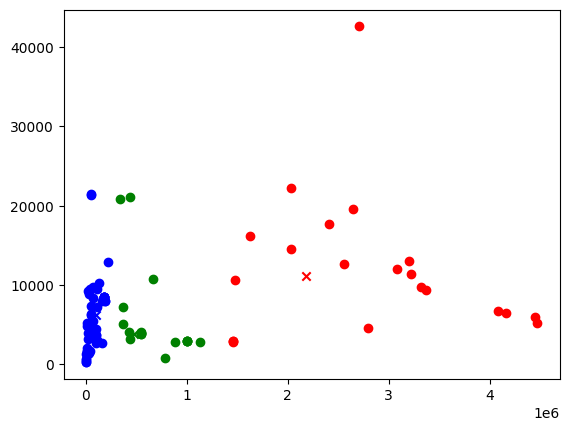

In [12]:
task3_test_data = test_data.copy()
group1= []
group2 = []
group3 = []
centroids = []
centroid_wannacry = [wannacry_mean_x, wannacry_mean_y]
centroid_startsurf = [startsurf_mean_x, startsurf_mean_y]
centroid_razy = [razy_mean_x,razy_mean_y]
centroids.append(centroid_wannacry)
centroids.append(centroid_startsurf)
centroids.append(centroid_razy)
centroids = np.array(centroids)


def find_group(centroids,test_data):
    group1 = []
    group2 = []
    group3 = []

    for i in range(test_data.shape[0]):
        distance1 = np.sqrt(np.abs(task3_test_data.iloc[i,0] - centroids[0,0]) ** 2 + np.abs(task3_test_data.iloc[i, 1] - centroids[0,1]) ** 2)
        distance2 = np.sqrt(np.abs(task3_test_data.iloc[i, 0] - centroids[1,0]) ** 2 + np.abs(task3_test_data.iloc[i, 1] - centroids[1,1]) ** 2)
        distance3 = np.sqrt(np.abs(task3_test_data.iloc[i, 0] - centroids[2,0]) ** 2 + np.abs(task3_test_data.iloc[i, 1] - centroids[2,1]) ** 2)
        distances = [distance1, distance2, distance3]
        # print(distances)
        if np.argmin(distances) == 0:
            group1.append([task3_test_data.iloc[i, 0], task3_test_data.iloc[i, 1]])
        elif np.argmin(distances) == 1:
            group2.append([task3_test_data.iloc[i, 0], task3_test_data.iloc[i, 1]])
        elif np.argmin(distances) == 2:
            group3.append([task3_test_data.iloc[i, 0], task3_test_data.iloc[i, 1]])
    group1 = np.array(group1)
    group2 = np.array(group2)
    group3 = np.array(group3)
    return group1, group2, group3

group1, group2, group3 = find_group(centroids, task3_test_data)
print ("group 1:", group1)
print ("group 2:", group2)
print ("group 3:", group3)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

In [13]:
#UPDATING THE CENTROIDS

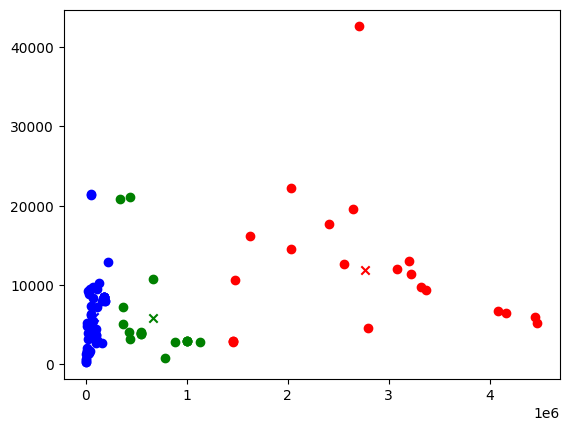

In [14]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

In [15]:
#Second Pass

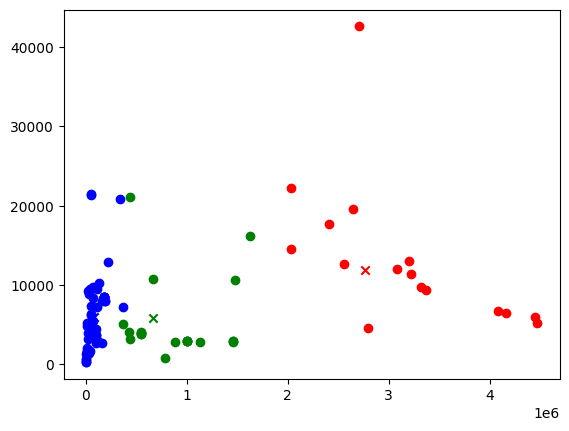

In [16]:
test_data = np.vstack([group1, group2, group3])
group1, group2, group3 = find_group(centroids, test_data)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

In [17]:
#UPDATING CENTROIDS

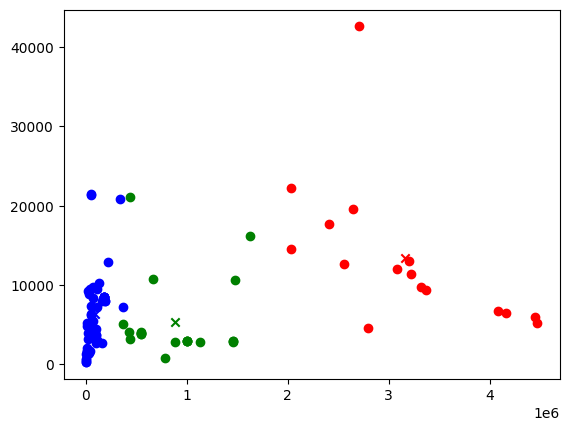

In [18]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

In [19]:
#THIRD PASS

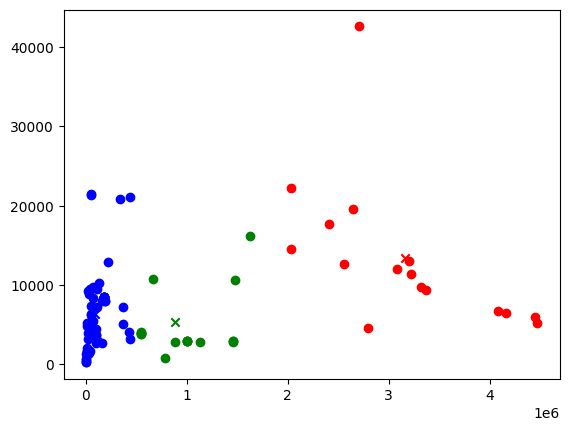

In [20]:
test_data = np.vstack([group1, group2, group3])
group1, group2, group3 = find_group(centroids, test_data)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

In [21]:
#RESULT

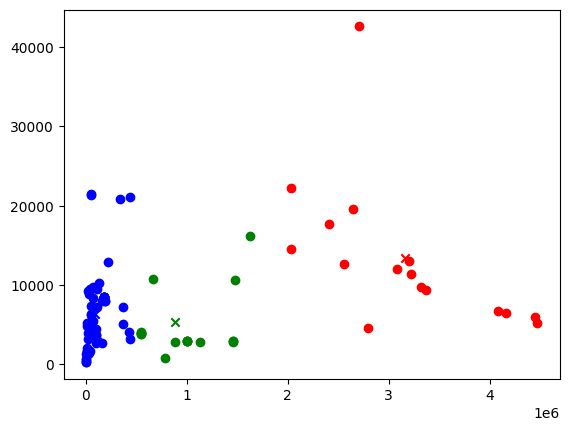

In [22]:
test_data = np.vstack([group1, group2, group3])
group1, group2, group3 = find_group(centroids, test_data)

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')
figsize=(20,10)
plt.show()

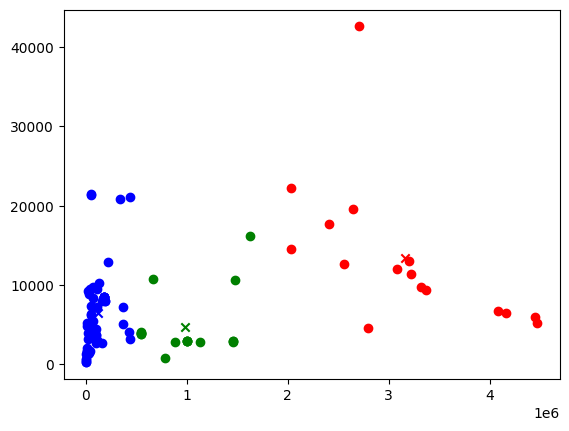

In [23]:
centroids = np.array([np.mean(group1, axis=0), np.mean(group2, axis=0), np.mean(group3, axis=0)])

plt.scatter(group1[:,0], group1[:,1], color='r')
plt.scatter(group2[:,0], group2[:,1], color='g')
plt.scatter(group3[:,0], group3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

array([[3159678.75      ,   13322.5       ],
       [ 984303.72222222,    4593.27777778],
       [ 115434.625     ,    6401.96428571]])

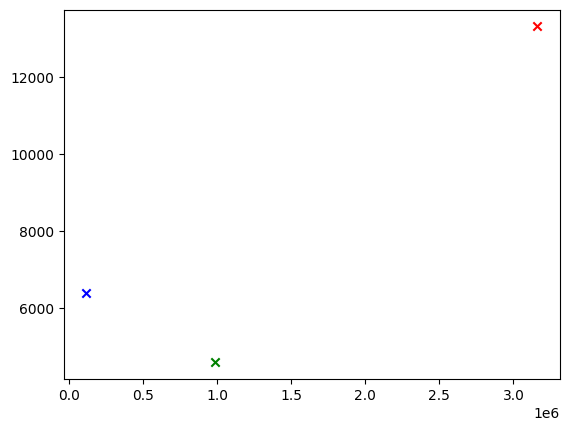

In [24]:
#new centroids
plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')
centroids

array([[2181660.66,   11087.1 ],
       [ 478778.12,    3754.04],
       [ 100505.22,    6158.28]])

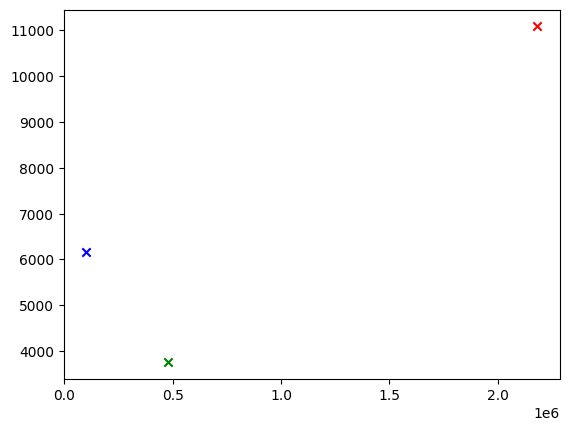

In [26]:
#centroids in task2
plt.scatter(wannacry_mean_x, wannacry_mean_y,marker='x',color= 'red')
plt.scatter(startsurf_mean_x,startsurf_mean_y,marker='x', color = 'green')
plt.scatter(razy_mean_x,razy_mean_y,marker='x', color = 'blue')
wannacry_centroids = (wannacry_mean_x, wannacry_mean_y)
startsurf_centroids = (startsurf_mean_x,startsurf_mean_y)
razy_centroids = (razy_mean_x, razy_mean_y)
old_centroids = np.array([wannacry_centroids])
old_centroids = np.append(old_centroids,[startsurf_centroids],axis=0)
old_centroids = np.append(old_centroids,[razy_centroids],axis=0)
old_centroids

In [27]:
comparison = old_centroids == centroids 
equal_arrays = comparison.all()
comparison


array([[False, False],
       [False, False],
       [False, False]])

### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier (2)

array([[3159678.75      ,   13322.5       ],
       [ 984303.72222222,    4593.27777778],
       [ 115434.625     ,    6401.96428571]])

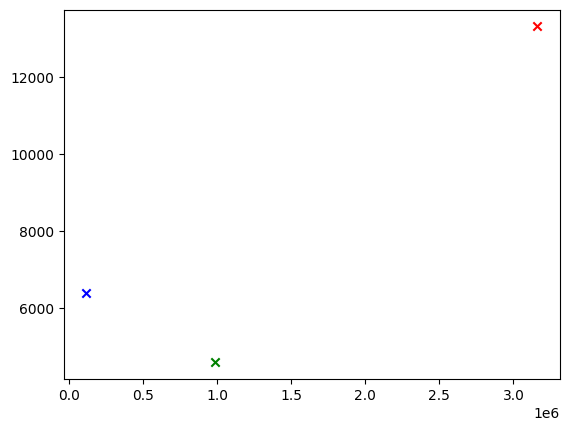

In [28]:
#centroids
plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')
centroids

In [28]:
score = 0

for i in range(test_data.shape[0]):
    distance1 = np.sqrt(np.abs(task3_test_data.iloc[i,0] - centroids[0,0]) ** 2 + np.abs(task3_test_data.iloc[i, 1] - centroids[0,1]) ** 2)
    distance2 = np.sqrt(np.abs(task3_test_data.iloc[i, 0] - centroids[1,0]) ** 2 + np.abs(task3_test_data.iloc[i, 1] - centroids[1,1]) ** 2)
    distance3 = np.sqrt(np.abs(task3_test_data.iloc[i, 0] - centroids[2,0]) ** 2 + np.abs(task3_test_data.iloc[i, 1] - centroids[2,1]) ** 2)
    distances = [distance1, distance2, distance3]
    predicted = np.argmin(distances)
    labels= ['wannacry','startsurf','razy']
    if labels[predicted] == task3_test_data.iloc[i,2]:
        score = score+1

print(score)


59


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification.

### Task 5: Scale the Input Features for further processing using the StandardScaler function (1)

In [30]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [31]:
train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


In [32]:
object= StandardScaler()
scale = object.fit_transform(features) 
print(scale, type(scale))

[[-0.0978198   0.67215876  0.82663021 ...  0.1357412   0.17814439
   0.40617301]
 [-0.35508456 -0.29156716 -0.27456922 ... -0.16889972 -0.21809863
  -0.2386657 ]
 [-0.35178418  0.37984379  0.24155808 ...  0.21077877  0.19202385
  -0.23072864]
 ...
 [-0.35058059 -0.37961299 -0.38237754 ... -0.31013839 -0.34541401
  -0.26045037]
 [-0.34595246  0.01402847 -0.18442612 ... -0.37112451 -0.38225198
  -0.24646054]
 [-0.37642742 -0.42802765 -0.47665936 ... -0.37851238 -0.39247895
  -0.27324031]] <class 'numpy.ndarray'>


### Task 6: Obtain numerical labels for each class using the LabelEncoder function (1)

In [33]:
labels = pd.read_csv('DATA/T2_data/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels

,label
0,high
1,high
2,high
3,high
4,high
...,...
27995,zbot
27996,zbot
27997,zbot
27998,zbot


In [34]:
from sklearn.preprocessing import LabelEncoder


lab = LabelEncoder()
le_labs = lab.fit_transform(labels['label'])
le_labs, type(le_labs)

(array([ 7,  7,  7, ..., 13, 13, 13]), numpy.ndarray)

### (Advanced) Task 7: Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [36]:
train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


In [37]:
#training
X = scale
y = le_labs
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=100,test_size=0.25, shuffle=True)

In [38]:
print('X_train : ')
print(X_train[0])
print(X_train.shape)
# print('')
# print('X_test : ')
# print(X_test.head())
# print(X_test.shape)
 
# print('')
# print('y_train : ')
# print(y_train.head())
# print(y_train.shape)
 
# print('')
# print('y_test : ')
# print(y_test.head())
# print(y_test.shape)

X_train : 
[ 3.98420544e-02 -1.83424672e-01 -2.20160340e-01 -1.84738100e-01
 -1.58716514e-01 -1.22564728e-01 -1.12878806e-01 -1.09383733e-01
 -1.28636883e-01 -5.86480526e-02 -8.49137718e-02 -5.34577170e-02
 -7.01692717e-02 -2.31583109e-02 -3.90791375e-02 -2.53071620e-03
 -1.68846051e-01 -4.32324061e-02 -3.70491715e-02 -5.06136738e-02
 -1.18166857e-01 -7.73802182e-02 -4.46855852e-02 -3.49695741e-02
 -1.03059460e-01 -3.41012825e-02 -1.35919490e-02 -2.48703288e-02
 -7.59886281e-02 -2.66661785e-02 -3.44120190e-02 -4.75080729e-02
 -7.74020056e-02 -3.29465998e-02 -5.04067693e-02 -4.47101766e-02
 -2.19248253e-01 -4.55483961e-02 -4.83380943e-02 -4.12612623e-02
 -7.40365498e-02 -2.29256648e-02 -4.72353026e-02 -8.42085346e-02
 -1.44217217e-01  1.22567035e-02 -6.43751752e-02 -4.82929420e-02
 -2.14954301e-02 -2.04514835e-02 -2.32886669e-02 -2.99178591e-02
 -2.57052789e-02 -2.48245753e-02 -1.96168479e-02 -2.36682380e-02
 -2.94621702e-02 -2.44364610e-02 -6.81645717e-02 -7.88423299e-02
 -6.35399543e-

### (Advanced) Task 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [39]:
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [40]:
X_train
y_train

array([ 9, 12, 12, ...,  6,  5,  1])

In [41]:
model = MLPClassifier()
mlp_model = model.fit(X_train, y_train)
print(mlp_model)

expected_y  = y_test
predicted_y = mlp_model.predict(X_test)

MLPClassifier()


In [42]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       470
           1       0.99      0.99      0.99       458
           2       0.97      0.97      0.97       551
           3       0.94      0.98      0.96       523
           4       0.96      0.93      0.95       513
           5       0.75      0.71      0.73       478
           6       0.81      0.96      0.88       506
           7       0.50      0.30      0.38       482
           8       0.52      0.58      0.55       513
           9       0.90      0.89      0.89       480
          10       0.61      0.91      0.73       510
          11       0.85      0.88      0.86       503
          12       0.89      0.97      0.93       513
          13       0.77      0.37      0.50       500

    accuracy                           0.80      7000
   macro avg       0.80      0.80      0.79      7000
weighted avg       0.80      0.80      0.79      7000

[[357   0   2   3   0   7

In [43]:
score = accuracy_score(expected_y,predicted_y,normalize=True, sample_weight=None)
score

0.8032857142857143

### (Advanced) Task 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
predictions= model.predict(X_test)
score = accuracy_score(y_test, predictions, normalize= True)
score

0.8761428571428571

### (Advanced) Task 10: Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

*Marks wil be awarded for how your tuning improves accuracy beyond 80%.*

In [46]:
import sklearn
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [47]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import MinMaxScaler
# knn_pipe = Pipeline([('mms', MinMaxScaler()),
#                      ('knn', KNeighborsClassifier())])
# params = [{'knn__n_neighbors': [3, 5, 7, 9],
#          'knn__weights': ['uniform', 'distance'],
#          'knn__leaf_size': [15, 20]}]
# gs_knn = GridSearchCV(knn_pipe,
#                       param_grid=params,
#                       scoring='accuracy',
#                       cv=5)
# gs_knn.fit(X_train, y_train)
# gs_knn.best_params_

# # find best model score
# gs_knn.score(X_train, y_train)

In [48]:
# param_grid = {'C': [0.1, 1, 10, 100],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'gamma':['scale', 'auto'],
#               'kernel': ['linear']}  
   
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# # fitting the model for grid search 
# grid.fit(X_train, y_train) 
 
# # print best parameter after tuning 
# print(grid.best_params_) 
# grid_predictions = grid.predict(X_test) 
   
# # print classification report 
# print(classification_report(y_test, grid_predictions)) 